In [20]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

2.6.0


### Prepare the data

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [22]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


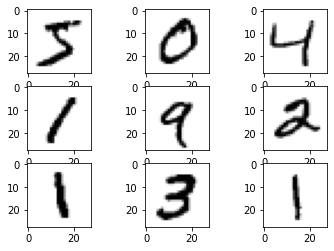

In [23]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.cm.binary)


In [24]:

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))


Train: X=(60000, 28, 28, 1), y=(60000, 10)
Test: X=(10000, 28, 28, 1), y=(10000, 10)


### Create the model

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

### Train the model

In [26]:
history = model.fit(x_train, y_train, epochs=8, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/8
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1351 - accuracy: 0.9581 - val_loss: 0.0631 - val_accuracy: 0.9803
Epoch 2/8
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.0358 - val_accuracy: 0.9890
Epoch 3/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0394 - val_accuracy: 0.9863
Epoch 4/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0243 - val_accuracy: 0.9921
Epoch 5/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.0223 - val_accuracy: 0.9926
Epoch 6/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0268 - val_accuracy: 0.9932
Epoch 7/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.0267 - val_accuracy:

### Save the model

In [28]:
model.save('final_model.h5')

### Check the model statistics

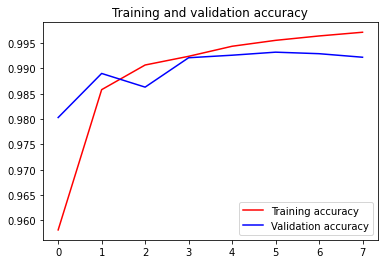

<Figure size 432x288 with 0 Axes>

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

### Make prediction

In [38]:
# Load the image
img = tf.keras.preprocessing.image.load_img('./sample_image.png', grayscale=True, target_size=(28, 28))

In [39]:
# Prepare the image
img = tf.keras.preprocessing.image.img_to_array(img)

img = img.reshape(1, 28, 28, 1)

img = img.astype('float32')
img = img / 255.0

In [40]:
from numpy import argmax
# Load the model
predictor_model = tf.keras.models.load_model('final_model.h5')

# Predict the value
predict_value = predictor_model.predict(img)
digit = argmax(predict_value)
print(digit)

7
